# Декомпозиция

- Шаг 1. Чтение данных и ознакомление
- Шаг 2. Предобработка данных (проверить корректность наименований колонок, переименовать колонки, удалить дубликаты, привести типы, заменить пропущенные значения, исследовать пропущенные значения, исследовать соответствие типов, исследовать дубликаты и тд.)
- Шаг 3. Исследовательский анализ (портреты клиентов и их сравнение)
- Шаг 4. Статистический анализ (корреляционный анализ)
- Шаг 5. Проверка гипотез (минимум две гипотезы)
- Шаг 6. Сегментация
- Шаг 7. Итоги, о том какие показатели влият на отток клиентов. Выводы и рекомендации


# Введение

В поседнее время в "Метанпромбанке" выявилась тенденция к уходу клиентов. Для того чтобы разобраться в ситуации, понять причины и выработать решения для улучшения ситуации нами будет проведены анализа поведения клиентов банка, сегментация клиентов и составление характерных портретов клиентов.

**Цели:** 
- Проанализируйть клиентов регионального банка и выделите сегменты клиентов,которые склонны уходить из банка.Проведите исследовательский анализ данных, определите все значимыепризнаки отточности (интервалы значений характеристик, которые связаны сповышенным оттоком, сравните портреты типичных клиентов, которые склонны и не склонныуходить из банка и т.д)
- Сформулировать и проверь статистические гипотезы.Проверьте гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались. Сформулируйте и проверьте статистическую гипотезу относительно представленных данных, которая поможет внести ясность в исследование 
- Объединить признаки отточности, сформируйте сегменты, отберите из них лучшие и дайте по ним рекомендации


### Описание данных

**Колонки:**
- **userid** — идентификатор пользователя,
- **score** — баллы кредитного скоринга,
- **City** — город,
- **Gender** — пол,
- **Age** — возраст,
- **Objects** — количество объектов в собственности
- **/ equity** — количество баллов собственности
- **Balance** — баланс на счёте,
- **Products** — количество продуктов, которыми пользуется клиент,
- **CreditCard** — есть ли кредитная карта,
- **Loyalty / last_activity** — активный клиент,
- **estimated_salary** — заработная плата клиента,
- **Churn** — ушёл или нет.

Первым делом подгрузим библиотеки, которые могут нам пригодиться для анализа.

In [1]:
#импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats as st
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

#столбцы и строки полностью, формат округлен
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format
#вывод значений без сокращений
pd.set_option('display.max_colwidth', -1)

# Шаг 1. Чтение данных и ознакомление

In [2]:
try:
    df = pd.read_csv('bank_scrooge.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')
    
df.head(10)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,"59,214.82",2,0,1,"75,719.14",1
1,146556,861.00,Рыбинск,Ж,37.00,5,"850,594.33",3,1,0,"86,621.77",0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,"107,683.34",0
3,225363,866.00,Ярославль,Ж,51.00,5,"1,524,746.26",2,0,1,"174,423.53",1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,"67,353.16",1
5,202305,856.00,Рыбинск,М,56.00,4,"863,687.24",3,1,0,"156,619.80",0
6,177259,807.00,Ярославль,Ж,39.00,3,"405,042.44",3,0,1,"103,838.32",0
7,218868,825.00,Ярославль,Ж,38.00,4,"458,145.40",2,1,1,"68,085.48",0
8,211686,923.00,Ярославль,М,54.00,5,"1,206,337.87",2,1,0,"155,371.79",0
9,133130,906.00,Ярославль,Ж,67.00,0,NaN,1,0,1,"238,055.53",0


In [3]:
df.shape

(10000, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Данные выгружены корректно.
Поле  age представлены не в подходящих типах.
По полям age, balance есть пропуски.

# Шаг 2. Предобработка данных

Приведем названия колонок к стандартному виду (приведем к нижнему регистру исправим название колонки userid)

In [5]:
df.columns = df.columns.str.lower().str.replace('userid', 'user_id')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Приведем столбец колонок  age к целочисленому типу

In [6]:
df=df.dropna(subset=['age'])
df['age']= df['age'].astype('int')

In [7]:
df

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.00,Рыбинск,Ж,25,1,"59,214.82",2,0,1,"75,719.14",1
1,146556,861.00,Рыбинск,Ж,37,5,"850,594.33",3,1,0,"86,621.77",0
2,120722,892.00,Рыбинск,Ж,30,0,NaN,1,1,1,"107,683.34",0
3,225363,866.00,Ярославль,Ж,51,5,"1,524,746.26",2,0,1,"174,423.53",1
4,157978,730.00,Ярославль,М,34,5,174.00,1,1,0,"67,353.16",1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.00,Рыбинск,М,27,1,"78,144.65",1,0,1,"18,943.64",0
9996,139170,894.00,Ярославль,М,46,0,NaN,1,1,0,"196,898.29",0
9997,115639,903.00,Ярославль,М,24,0,NaN,2,1,1,"108,905.09",0
9998,148700,777.00,Ярославль,Ж,68,3,"865,457.97",3,0,1,"86,874.90",0


Проверим данные на дубликаты.

In [8]:
df.duplicated().sum()

0

Дубликаты отсутствуют

In [9]:
df['user_id'].duplicated().sum() 

50

In [10]:
df[df.duplicated(subset=['user_id'], keep='first')]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1583,190253,726.00,Ярославль,М,49,0,NaN,1,1,1,"177,700.78",0
1837,210662,896.00,Рыбинск,Ж,37,0,NaN,2,0,0,"90,916.04",0
2138,131419,739.00,Рыбинск,Ж,37,3,"1,307,941.65",3,0,0,"103,867.47",0
2302,220816,934.00,Рыбинск,Ж,74,5,"1,294,285.39",3,1,0,"95,606.80",0
2998,208081,821.00,Рыбинск,Ж,62,3,"493,608.26",2,1,1,"33,491.45",0
3039,170312,813.00,Рыбинск,Ж,47,3,"370,027.67",2,0,0,"129,835.56",0
3106,185748,912.00,Ярославль,Ж,47,5,"1,598,218.98",2,0,0,"180,256.98",0
3817,211130,918.00,Рыбинск,Ж,55,0,NaN,2,1,1,"244,202.04",0
4186,217643,804.00,Рыбинск,Ж,40,2,"301,836.65",2,1,1,"81,137.22",0
4216,226719,903.00,Рыбинск,Ж,63,0,NaN,1,1,0,"138,582.58",0


In [11]:
df.query('user_id == 124450 or user_id == 168998 or user_id == 140934')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4212,140934,919.00,Ярославль,Ж,29,4,"603,946.18",3,0,1,"158,438.79",0
5020,168998,886.00,Ярославль,Ж,35,4,"394,780.61",2,1,1,"510,577.10",1
8164,124450,859.00,Ярославль,Ж,38,6,"516,811.20",1,1,1,"95,144.63",1
9775,124450,758.00,Рыбинск,Ж,36,0,"73,574.07",2,0,1,"79,963.59",0
9785,168998,895.00,Рыбинск,М,44,0,"282,653.53",3,0,0,"255,296.47",0


user_id хоть и одинаковый, но клиенты явно не дублируются, к тому же, они из разных городов. Значит у клиентов из разных городов, может быть одинаковый id, это не дубликаты. Другие столбцы проверять на неявные дубликаты нет смысла, так как понятно что в других столбцах они и так будут повторяться.

Проведем замену значений поля gender с "М" на 1 и с "Ж" на 0

In [12]:
#замена значений "М" на 1, "Ж" на 0:
df.loc[df['gender']=='М', 'gender'] = 1
df.loc[df['gender']=='Ж','gender'] = 0

#приведем к типу данных int:
df['gender'] = df['gender'].astype(int)
df

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.00,Рыбинск,0,25,1,"59,214.82",2,0,1,"75,719.14",1
1,146556,861.00,Рыбинск,0,37,5,"850,594.33",3,1,0,"86,621.77",0
2,120722,892.00,Рыбинск,0,30,0,NaN,1,1,1,"107,683.34",0
3,225363,866.00,Ярославль,0,51,5,"1,524,746.26",2,0,1,"174,423.53",1
4,157978,730.00,Ярославль,1,34,5,174.00,1,1,0,"67,353.16",1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.00,Рыбинск,1,27,1,"78,144.65",1,0,1,"18,943.64",0
9996,139170,894.00,Ярославль,1,46,0,NaN,1,1,0,"196,898.29",0
9997,115639,903.00,Ярославль,1,24,0,NaN,2,1,1,"108,905.09",0
9998,148700,777.00,Ярославль,0,68,3,"865,457.97",3,0,1,"86,874.90",0


посмотрим на пропучщенные значения

In [13]:
df.isna().sum()

user_id          0   
score            0   
city             0   
gender           0   
age              0   
equity           0   
balance          2279
products         0   
credit_card      0   
last_activity    0   
est_salary       0   
churn            0   
dtype: int64

In [14]:
df.dropna(subset=['age'], inplace=True)
df.reset_index(inplace=True,drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9974 entries, 0 to 9973
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9974 non-null   int64  
 1   score          9974 non-null   float64
 2   city           9974 non-null   object 
 3   gender         9974 non-null   int64  
 4   age            9974 non-null   int64  
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 935.2+ KB


Пропусков в столбце age мало и логично от них избавиться

теперь разберемся с пропусками в стобце **balance**

In [15]:
df.isna().sum()

user_id          0   
score            0   
city             0   
gender           0   
age              0   
equity           0   
balance          2279
products         0   
credit_card      0   
last_activity    0   
est_salary       0   
churn            0   
dtype: int64

In [16]:
df.query('balance == 0')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3896,179831,730.00,Ярославль,1,18,0,0.00,2,1,1,"64,548.33",0
6750,148456,813.00,Ярославль,1,20,2,0.00,2,1,0,"23,876.51",0


Для того чтобы построить распределения относительно отсутствия или наличия пропусков в столбце balance скопируем датасет, заменим пропущенные значения в столбце balance в скопированном датасете на -1 и создадим новый столбец, в котором индикатором наличия пропуска в столбце balance будет значение -1, а индикатором того, что баланс у клиента указан - значение 1.

In [17]:
df_balance = df.copy()

In [18]:
df_balance['balance'] = df_balance['balance'].fillna(-1)
df_balance['is_balance'] = df_balance['balance'].copy() 
df_balance.loc[(df_balance['balance'] != -1), 'is_balance'] = 1
df_balance['is_balance'] = df_balance['is_balance'].astype(int)
df_balance.head(10)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,is_balance
0,183012,850.00,Рыбинск,0,25,1,"59,214.82",2,0,1,"75,719.14",1,1
1,146556,861.00,Рыбинск,0,37,5,"850,594.33",3,1,0,"86,621.77",0,1
2,120722,892.00,Рыбинск,0,30,0,-1.00,1,1,1,"107,683.34",0,-1
3,225363,866.00,Ярославль,0,51,5,"1,524,746.26",2,0,1,"174,423.53",1,1
4,157978,730.00,Ярославль,1,34,5,174.00,1,1,0,"67,353.16",1,1
5,202305,856.00,Рыбинск,1,56,4,"863,687.24",3,1,0,"156,619.80",0,1
6,177259,807.00,Ярославль,0,39,3,"405,042.44",3,0,1,"103,838.32",0,1
7,218868,825.00,Ярославль,0,38,4,"458,145.40",2,1,1,"68,085.48",0,1
8,211686,923.00,Ярославль,1,54,5,"1,206,337.87",2,1,0,"155,371.79",0,1
9,133130,906.00,Ярославль,0,67,0,-1.00,1,0,1,"238,055.53",0,-1


Посмотрим распределение наличия или отсутствия пропусков в столбце balance в разрезе других признаков:

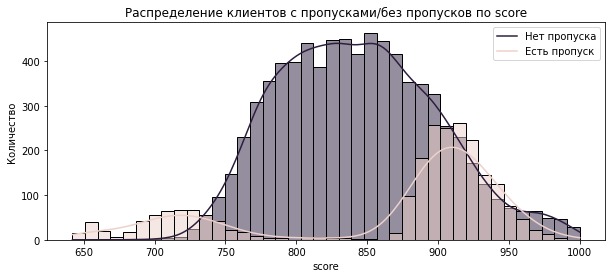

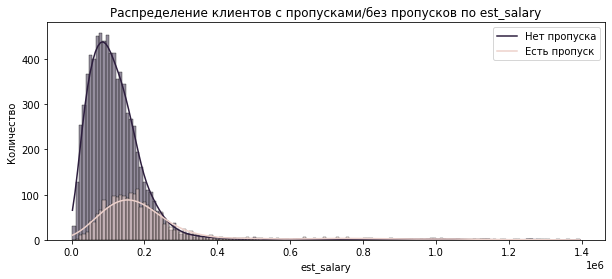

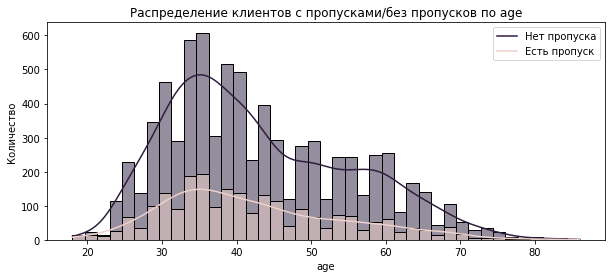

In [19]:
ft = ['score', 'est_salary', 'age']
for i in ft:
    plt.figure(figsize=(10, 4))
    sns.histplot(x=i, data=df_balance, hue='is_balance', kde=True)
    plt.title(f'Распределение клиентов с пропусками/без пропусков по {i}')
    plt.ylabel('Количество')
    plt.legend(['Нет пропуска', 'Есть пропуск'])
    plt.show()

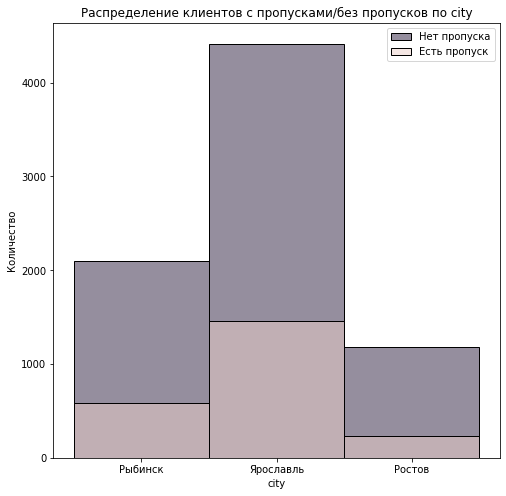

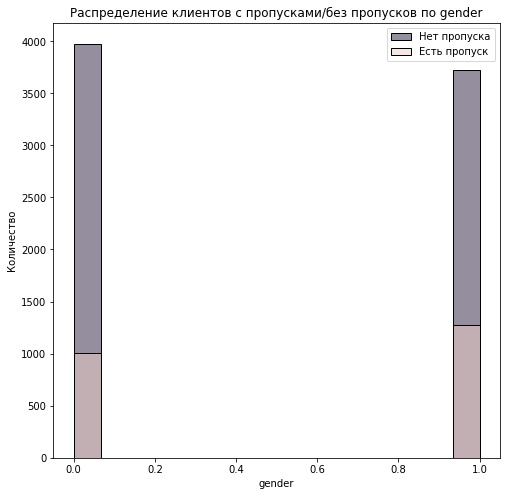

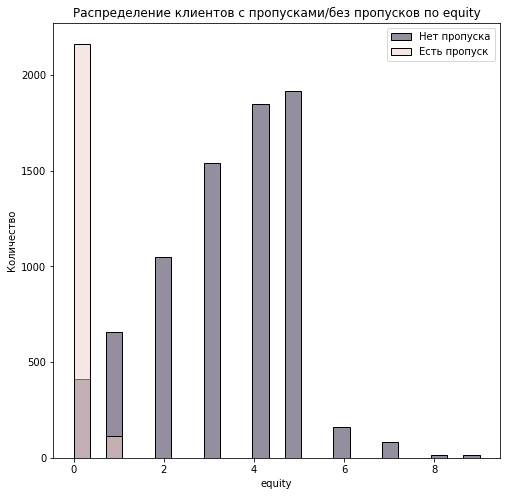

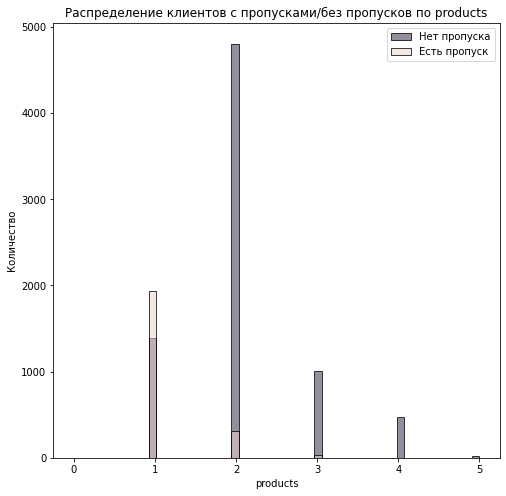

In [20]:
ft_2 = ['city', 'gender', 'equity', 'products']
for i in ft_2:
    plt.figure(figsize=(8, 8))
    sns.histplot(x=i, data=df_balance, hue='is_balance')
    plt.title(f'Распределение клиентов с пропусками/без пропусков по {i}')
    plt.ylabel('Количество')
    plt.legend(['Нет пропуска', 'Есть пропуск'])
    plt.show()

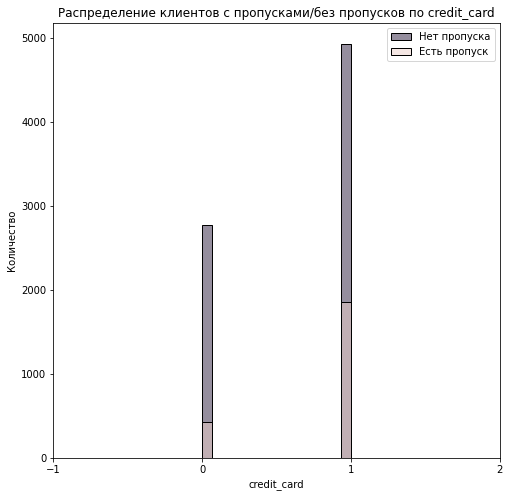

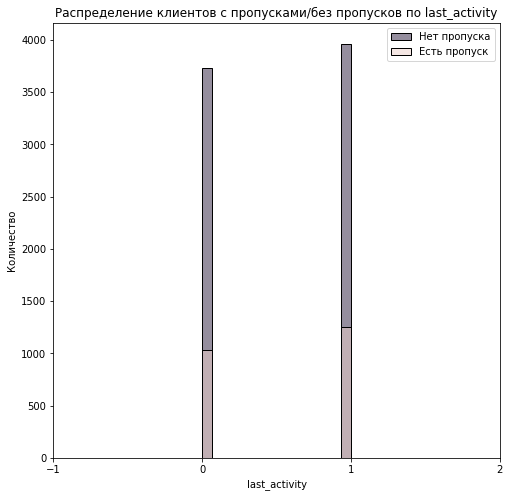

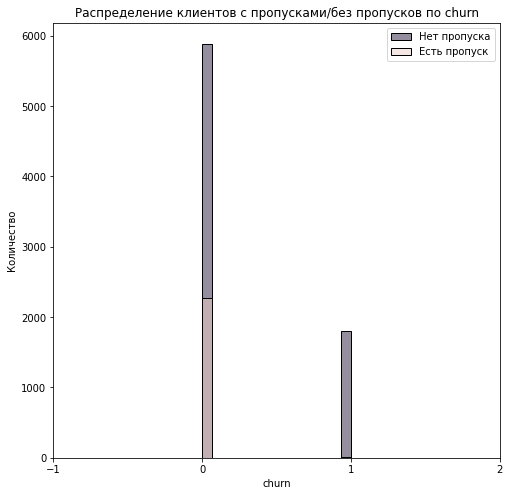

In [21]:
ft_3 = ['credit_card', 'last_activity', 'churn']
for i in ft_3:
    plt.figure(figsize=(8, 8))
    sns.histplot(x=i, data=df_balance, hue='is_balance')
    plt.title(f'Распределение клиентов с пропусками/без пропусков по {i}')
    plt.ylabel('Количество')
    plt.xticks(ticks=[-1,0,1,2])
    plt.legend(['Нет пропуска', 'Есть пропуск'])
    plt.show()

- Больше всего клиентов с пропущенным балансом из Ярослаля, но и в остальных городах тоже такие есть
- Распределение по полу практически равномерное, ненамного больше мужчин
- В основном у таких клиентов нет собственности, также присутствуют те, у кого в собственности 1 объект
- В основном такие клиенты пользуются 1 продуктом банка, есть пользующиеся двумя продуктами
- Есть клиенты у которых нет кредитной карты, в основном у таких клиентов кредитная карта есть
- Среди клиентов с пропусками в столбце balance есть и активные пользователи и те, кто давно не обращался за услугами банка, распределение практически одинаковое, ненамного больше активных,
- В основном это неотточые клиенты, но и те кто ушел в отток также присутствуют
- В основном у клиентов с отсутствующим значением баланса 900-950 баллов кредитного скоринга
- Среди таких клиентов преобладает возраст 30-45 лет
- Заработная плата таких клиентов в основном около 200 000. Длинный "хвост", который мы наблюдаем на графке распределения по заработной плате свидетельствует о наличии большого количества выбросов

Пропуски в balance не зависят от информации по какой-либо конкретной характеристике. Пропуски носят случайный характер в рамках групп.

Заменим пропуски средним значением по группам таких характеристик, как products, churn, city, credit_card, score так как распределение по этим характеристикам клиентов с пропусками отличается от распределения по этим же характеристикам клиентов без пропусков.

In [22]:
medians=(df.groupby(['city','products','churn', 'credit_card', 'score'],as_index=False).agg({'balance':'median'})).rename(columns={'balance':'median_balance'})
df=df.merge(medians, on=['city','products','churn', 'credit_card', 'score'])
df.loc[df['balance'].isna(), 'balance']=df.loc[df['balance'].isna(), 'median_balance']
df=df.drop('median_balance', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9973
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9974 non-null   int64  
 1   score          9974 non-null   float64
 2   city           9974 non-null   object 
 3   gender         9974 non-null   int64  
 4   age            9974 non-null   int64  
 5   equity         9974 non-null   int64  
 6   balance        8781 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1013.0+ KB


In [23]:
df['balance'].isna().sum()

1193

Остались незаполненными 1193 пропуска, значит для их заполнения средним значением в данных не нашлось подходящей групп,оставим их как есть, так как невозможно предложить логичной замены.

In [24]:
df.query('products == 0')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
9735,147837,962.00,Рыбинск,0,79,3,NaN,0,0,0,"25,063.96",1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9973
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9974 non-null   int64  
 1   score          9974 non-null   float64
 2   city           9974 non-null   object 
 3   gender         9974 non-null   int64  
 4   age            9974 non-null   int64  
 5   equity         9974 non-null   int64  
 6   balance        8781 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1013.0+ KB


In [26]:
df=df.drop(df[df['products']==0].index)

In [27]:
df.query('products == 0')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn


**Вывод:**

- выяснили, что дубликаты полные и не полные отсутствуют
- привели названия столбцов к стандартному ввиду
- перекодировали столбец gender численно
- обработали пропуски в столбцах age и balance (частично)

# Шаг 3. Исследовательский анализ

Переходим к исследовательскому анализу данных. нашей целью является определение характерных портретов клиентов банка.

посмотрим на средние значения для клиентов по городам и факту оттока.

In [28]:
table = df.drop('user_id', axis=1).groupby(['city', 'churn']).mean()
table

score  gender   age  equity      balance  products  \
city      churn                                                       
Ростов    0     839.97 0.44    44.45 2.61    606,571.92   1.78        
          1     854.23 0.66    42.81 3.65    903,091.54   2.20        
Рыбинск   0     845.88 0.45    43.52 2.42    684,963.73   1.73        
          1     862.36 0.68    42.24 3.60    942,553.00   2.25        
Ярославль 0     846.48 0.48    42.44 2.30    826,358.78   1.77        
          1     865.92 0.64    40.79 3.86    1,263,507.07 2.47        

                 credit_card  last_activity  est_salary  
city      churn                                          
Ростов    0     0.58         0.50           108,722.47   
          1     0.50         0.66           123,662.56   
Рыбинск   0     0.67         0.53           135,138.32   
          1     0.51         0.74           133,156.93   
Ярославль 0     0.76         0.46           163,015.22   
          1     0.58         0.70           160,149.42

Первые выводы:

- уровень кредитного скоринга по городам примерно одинаков, а у клиентов ушедших в отток он выше;

- возрастное распределение по городам и факту оттока одинаковое;

- количество баллов собственности примерно равное;

- явные различия наблюдаются в балансе лицевого счета: отметим, что в отток чаще попадают клиенты с более высоким балансом;

- количество используемых продуктов в среднем по всем группам равное;

- наличие кредитной карты больше у тех кто остается и не уходит;

- самые активные клиенты чаще уходят;

- уровень оценочной заработной платы больше всего у Ярославля, при этом можно заметить что заработная плата особо не влияет на отток клиентов.

In [29]:
#функция для формирования графиков распределения:
#data - датафрейм, на основе которого строится распределение
#hue- признак, по которому мы хотим увидеть детализацию данных

def tables(data, hue=None):
    #дискретные значения
    for column in ['city','gender', 'credit_card', 'last_activity', 'equity', 'products', 'churn']:
        ax = sns.countplot(data=data, x=column, hue=hue);
        plt.title(f'Распределение клиентов по признаку {column}', fontsize = 16, color = 'black')
        plt.show()
    
    plt.figure(figsize=(16,7))
    sns.countplot(data=data, x='age', hue=hue);
    plt.title('Распределение клиентов по признаку age', fontsize = 16, color = 'black')
    plt.show()
   
    #непрерывные значения
    for column in ['score',  'balance', 'est_salary']:
        sns.kdeplot(data=data, x=column, hue=hue);
        plt.title(f'Распределение клиентов по признаку {column}', fontsize = 16, color = 'black')
        plt.show()

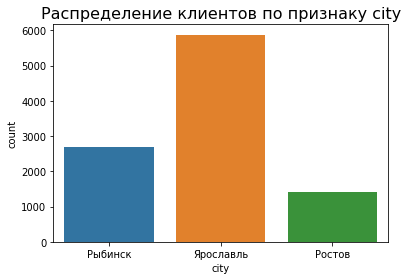

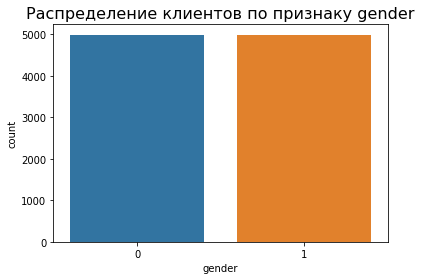

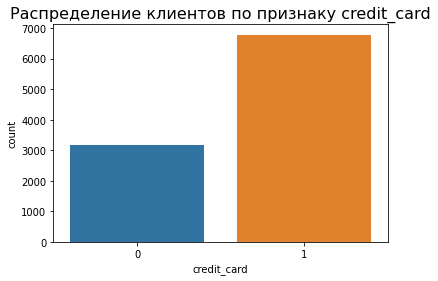

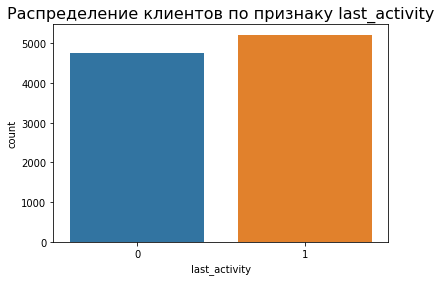

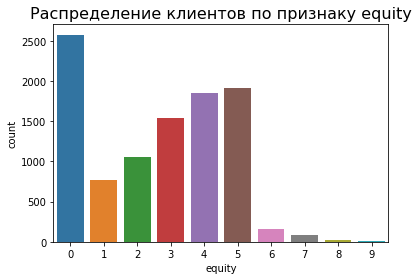

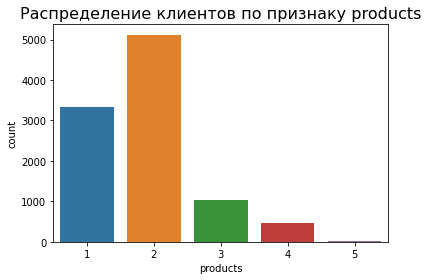

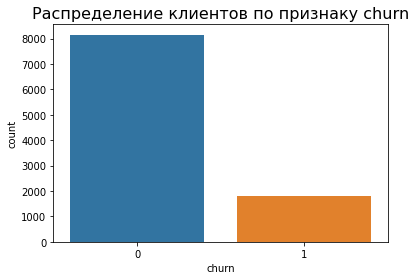

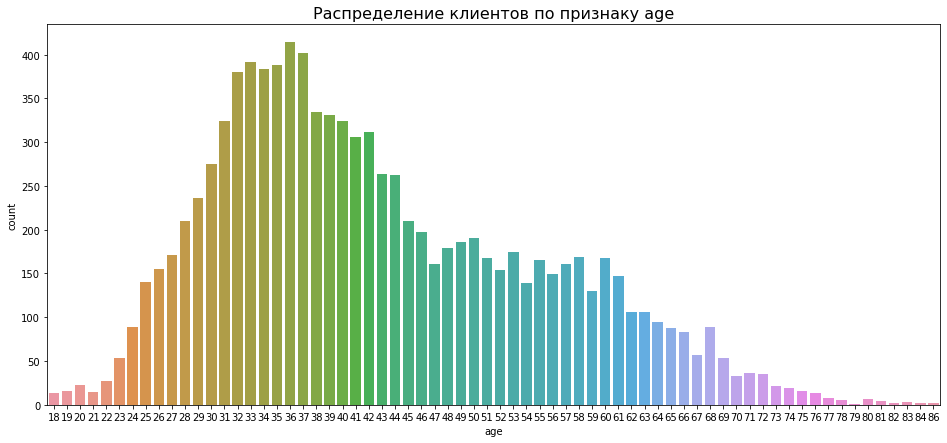

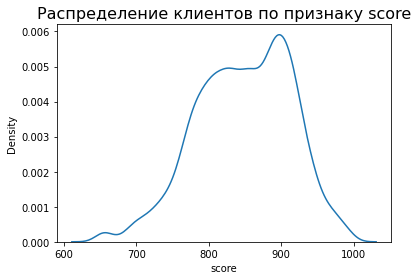

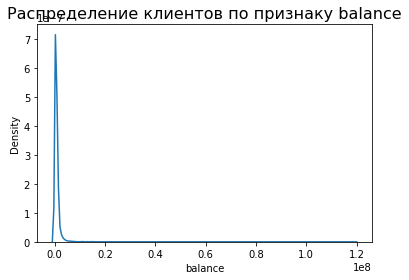

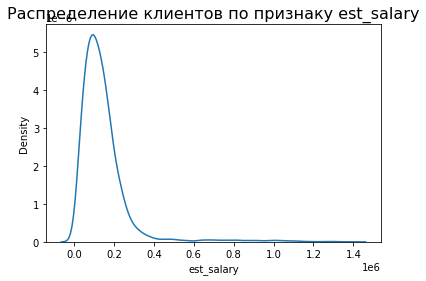

In [30]:
#формируем визуализацию
tables(df, hue=None) 

In [31]:
df.describe()

,user_id,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,"9,973.00","9,973.00","9,973.00","9,973.00","9,973.00","8,781.00","9,973.00","9,973.00","9,973.00","9,973.00","9,973.00"
mean,"171,757.62",848.67,0.50,42.73,2.63,"835,090.83",1.87,0.68,0.52,"147,799.12",0.18
std,"33,696.37",65.39,0.50,12.18,1.98,"1,875,616.44",0.79,0.47,0.50,"139,287.08",0.39
min,"94,561.00",642.00,0.00,18.00,0.00,0.00,1.00,0.00,0.00,"2,546.30",0.00
25%,"142,757.00",802.00,0.00,33.00,0.00,"309,922.62",1.00,0.00,0.00,"75,252.02",0.00
50%,"172,651.00",853.00,1.00,40.00,3.00,"552,881.42",2.00,1.00,1.00,"119,643.06",0.00
75%,"201,164.00",900.00,1.00,51.00,4.00,"1,003,591.92",2.00,1.00,1.00,"174,499.96",0.00
max,"229,145.00","1,000.00",1.00,86.00,9.00,"119,113,552.01",5.00,1.00,1.00,"1,395,064.45",1.00


**Вывод**

Больше всего клиентов банка находится в Ярославле (около 5,8 тыс.клиентов), в Рыбинске (около 2,8 тыс.) и Ростове - в 2 раза меньше, в Ростове меньше других (около 1,5 тыс).

По данным выше мы можем предварительно составить достаточно обобщенный портрет клиента банка: мужчин и женщин примерно одинковое количество, возраст 42 года с 2-3 баллами собствености, со средним остатком на счетах 765 тыс.руб. и средним доходом в 147 тыс.руб,пользуется 1-2 продуктами, один их которых в 70% случаях - кредитная карта. Клиент скорее активный, чем нет, но активные/неактивные -примерно на одном уровне, вероятность ухода - 20%

In [32]:
churn_group = df.groupby('churn')['churn'].count()
churn_group.columns = ['churn_cnt']
churn_group

churn
0    8155
1    1818
Name: churn, dtype: int64

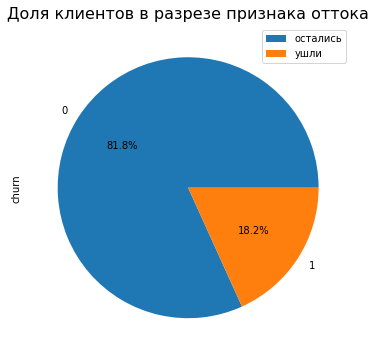

In [33]:
#строим круговую диаграмму
churn_group.plot(kind = 'pie', y ='churn_cnt', autopct='%1.1f%%', figsize= (6,6),
                       );
plt.title('Доля клиентов в разрезе признака оттока', fontsize = 16)
plt.legend(['остались', 'ушли'])
plt.show()

In [34]:
df.groupby(['churn'])['score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'].mean()

,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
churn,,,,,,,,,,
0,845.40,0.47,43.02,2.38,"757,656.74",1.76,0.71,0.48,"147,674.64",0.00
1,863.36,0.65,41.43,3.76,"1,133,942.70",2.38,0.55,0.70,"148,357.48",1.00


В таблице средних значений относительно показателя оттока мы видим, что среди клиентов, которые остаются с банком, больше женщин, их возраст ,больше, чем у тех, кто уходит (43 лет против 41), а активных клиентов среди них меньше (48% против 70%), а также остаток дохода у них меньше 683 тыс. против 1130. тыс, наличие у них кредитной карты 70% против 55%. Сумма дохода, количество баллов собственности, а также кредитный рейтинг отличаются несильно.

In [35]:
#Функция создания сводных таблиц
def prcnt_func(index_a, index_b, column_a, column_b, merged, sort):
    '''создадим таблицу из двух сводных таблиц с расчетом процентов от общего числа по различным группам'''
    a = df.pivot_table(index=index_a, values='user_id', aggfunc='count').reset_index()
    a.columns = column_a
    a= a.sort_values(by='count', ascending=False)
    b = df.pivot_table(index=index_b, values='user_id', aggfunc='count').reset_index()
    b.columns = column_b
    a = a.merge(b, on=merged, how='left')
    a['%'] = (a['count']/a['sum']*100).round()
    return display(a.sort_values(by=sort))

In [36]:
index_a = ['city', 'churn']
column_a = ['city', 'churn', 'count']
index_b = 'city'
column_b = ['city', 'sum']
merged = 'city'
sort = 'city'

#Создадим сводную таблицу
prcnt_func(index_a, index_b, column_a, column_b, merged, sort)

,city,churn,count,sum,%
2,Ростов,0,1151,1416,81.00
5,Ростов,1,265,1416,19.00
1,Рыбинск,0,2246,2682,84.00
4,Рыбинск,1,436,2682,16.00
0,Ярославль,0,4758,5875,81.00
3,Ярославль,1,1117,5875,19.00


In [37]:
index_a = ['products', 'churn']
column_a = ['products', 'churn', 'count']
index_b = 'products'
column_b = ['products', 'sum']
merged = 'products'
sort = 'products'

#Создадим сводную таблицу
prcnt_func(index_a, index_b, column_a, column_b, merged, sort)

,products,churn,count,sum,%
1,1,0,3088,3323,93.00
6,1,1,235,3323,7.00
0,2,0,4141,5119,81.00
2,2,1,978,5119,19.00
3,3,0,741,1038,71.00
5,3,1,297,1038,29.00
4,4,1,300,474,63.00
7,4,0,174,474,37.00
8,5,0,11,19,58.00
9,5,1,8,19,42.00


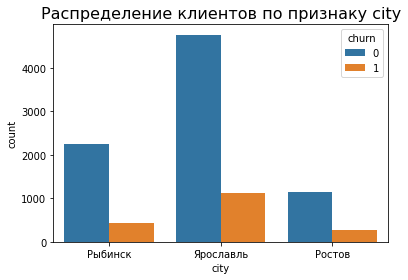

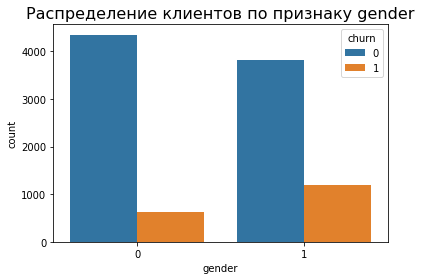

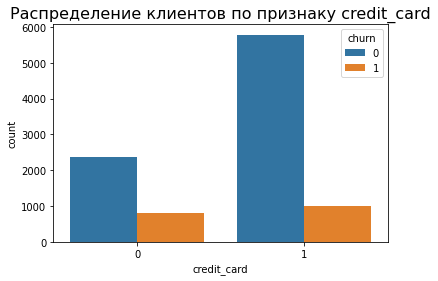

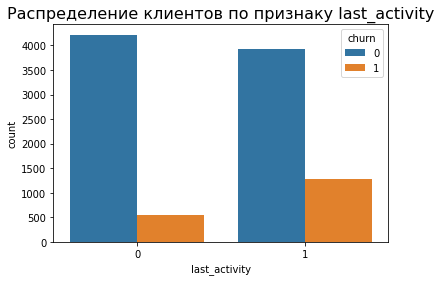

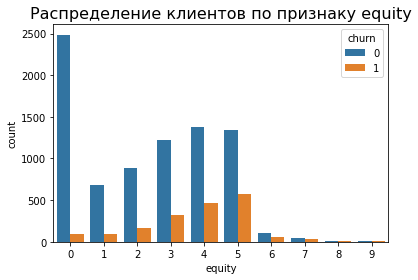

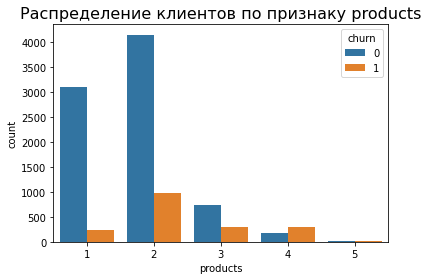

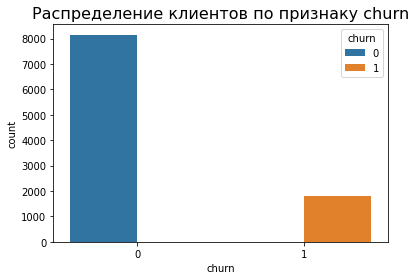

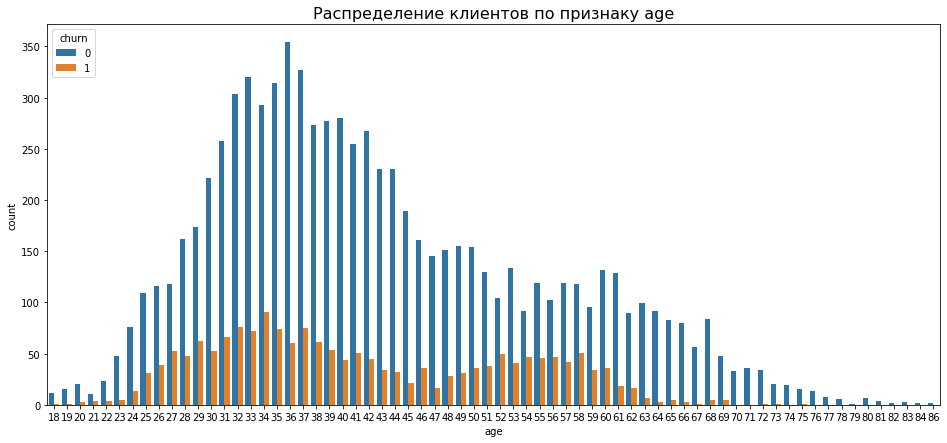

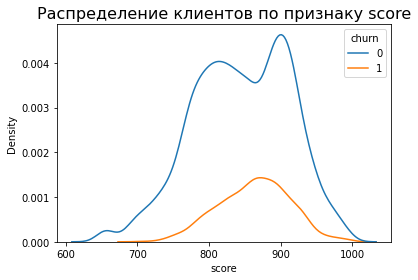

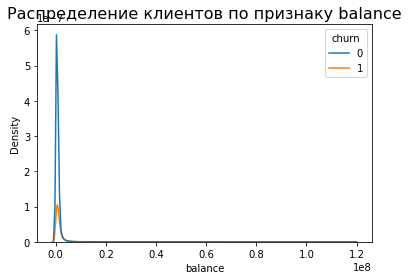

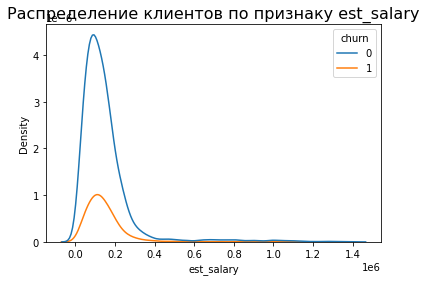

In [38]:
tables(df, hue='churn')  

**Вывод**

Мы видим, что общая доля оттока составляет 20% от общего количества пользователей.

При этом наименьшая доля оттока - в Рыбинске (16%), наибольший-в Ростове и Ярославле(19% от количества постоянных клиентов). Мужчины более склонны к уходу. Пользователи с кредитными картами уходят в меньшей степени чем у кого их нет, при этом активные клиенты с большей долей вероятности уходят из банка.

Клиенты, которые пользуются 1 продуктом - самая многочисленная группа по количеству преданных банку клиентов, а доля оттока у этой категории самая низкая. Тех, кто пользуется  2 продуктами немногим меньше,3 продуктами - 30 % оточных. Пользователи с 4-5 продуктами еще более  отточны.

Больше всего клиентов - это люди среднего возраста, 30-43 года, они составляют основную массу тех, кто остается с банком. Наиболее склонны к оттоку лица от 25-27 и 51-60 лет.

Кредитный рейтинг, остаток на балансе и заработная плата клиента не оказывает влияния на принятие решения об уходе из банка.

## Шаг 4. Статистический анализ

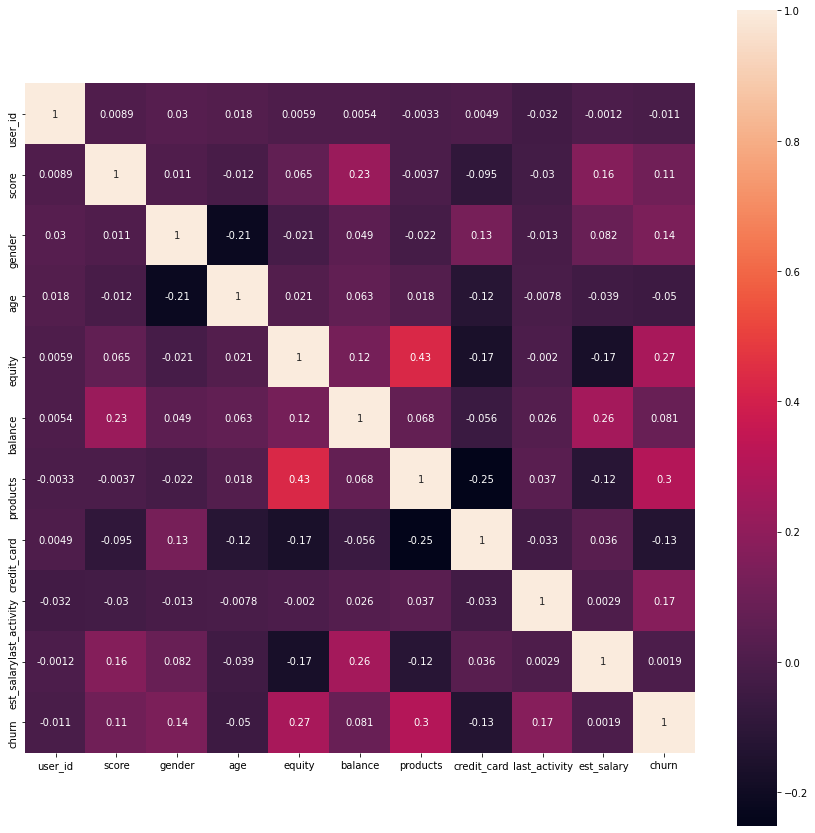

In [39]:
#построим и отрисуем матрицу корреляций
cm = df.corr() #вычисляем матрицу корреляций

plt.figure(figsize=(15,15))
#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(cm, annot=True, square=True)

plt.show()

Самая большая корреляция между стобцами products и equity (43%) Что логично чем больше у клиента разной собственостью тем большими программмами банка он пользуется.

## Категоризация данных по возрасту клиентов

На основании выявленных нами возрастных особенностей поведения клиентов проведем категоризацию клиентов на возрастные группы:

- младше 25 лет;

- от 26 до 35 лет;

- от 36 до 45 лет;

- от 46 до 60 лет;

- старше 60 лет.

In [40]:
#Функция разбивки на возрастные группы
def age_group(age):
    '''оператором сравнения будем проверять значения и выделять каждое в отдельную группу'''
    if age<25:
        return '<25'
    if age<35:
        return '26-35'
    if age<45:
        return '36-45'
    if age<60:
        return '46-60'
    return '>60'

#применим функцию к датафрейму
df['age_group'] = df['age'].apply(age_group)

#Функция создания сводных таблиц
def prcnt_func(index_a, index_b, column_a, column_b, merged, sort):
    '''создадим таблицу из двух сводных таблиц с расчетом процентов от общего числа по различным группам'''
    a = df.pivot_table(index=index_a, values='user_id', aggfunc='count').reset_index()
    a.columns = column_a
    a= a.sort_values(by='count', ascending=False)
    b = df.pivot_table(index=index_b, values='user_id', aggfunc='count').reset_index()
    b.columns = column_b
    a = a.merge(b, on=merged, how='left')
    a['%'] = (a['count']/a['sum']*100).round()
    return display(a.sort_values(by=sort))

,age_group,churn,count,sum,%
1,26-35,0,2076,2667,78.00
4,26-35,1,591,2667,22.00
0,36-45,0,2807,3337,84.00
6,36-45,1,530,3337,16.00
2,46-60,0,1969,2533,78.00
5,46-60,1,564,2533,22.00
7,<25,0,205,236,87.00
9,<25,1,31,236,13.00
3,>60,0,1098,1200,92.00
8,>60,1,102,1200,8.00


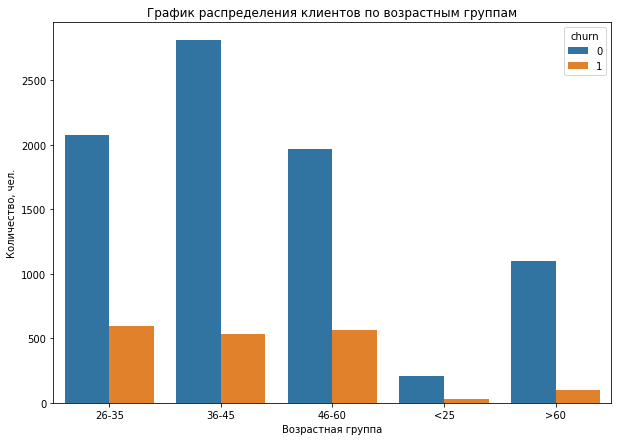

In [41]:
index_a = ['age_group', 'churn']
column_a = ['age_group', 'churn', 'count']
index_b = 'age_group'
column_b = ['age_group', 'sum']
merged = 'age_group'
sort = 'age_group'

#Создадим сводную таблицу
prcnt_func(index_a, index_b, column_a, column_b, merged, sort)

#Отобразим столюбчатую диаграмму распределения по возрастным группам
plt.figure(figsize=(10, 7))
sns.countplot(x='age_group', hue='churn', data=df)
plt.title('График распределения клиентов по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество, чел.')
plt.show()

Самый большой отток групп прослеживается в 26-35 и 46-60 лет (22 %), потом идет группа 36-45 (16 %), меньше всего у группы >60 (9 %)

У группы <25 (14 %), при этом это тут самая маленькая выборка по сравнению с другими группами, корректно считать тут отток мы не можем

## Анализ поведения клиентов по городам городах

Общие показатели оттока по городам

,city,churn,count,sum,%
2,Ростов,0,1151,1416,81.00
5,Ростов,1,265,1416,19.00
1,Рыбинск,0,2246,2682,84.00
4,Рыбинск,1,436,2682,16.00
0,Ярославль,0,4758,5875,81.00
3,Ярославль,1,1117,5875,19.00


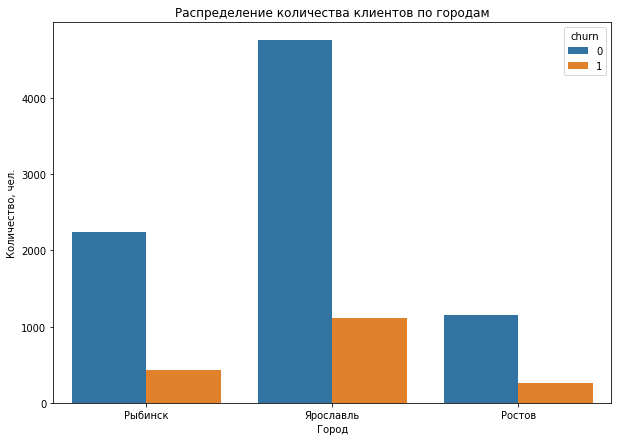

In [42]:
index_a = ['city', 'churn']
column_a = ['city', 'churn', 'count']
index_b = 'city'
column_b = ['city', 'sum']
merged = 'city'
sort = 'city'

#Создадим сводную таблицу
prcnt_func(index_a, index_b, column_a, column_b, merged, sort)

#Отобразим столюбчатую диаграмму распределения по городам
plt.figure(figsize=(10, 7))
sns.countplot(x='city', hue='churn', data=df)
plt.title('Распределение количества клиентов по городам')
plt.xlabel('Город')
plt.ylabel('Количество, чел.')
plt.show()

Ростов и Ярославь отток 19 %, в Рыбинске чуть лучше - 16 %

In [43]:
df.groupby(['city', 'churn'])['score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary'].agg(
       ['mean', 'median', 'count']).T

city                     Ростов               Рыбинск             Ярославль  \
churn                         0          1          0          1          0   
score         mean   839.97     854.23     845.88     862.36     846.48       
              median 838.00     856.00     850.00     867.50     850.00       
              count  1,151.00   265.00     2,246.00   436.00     4,758.00     
gender        mean   0.44       0.66       0.45       0.68       0.48         
              median 0.00       1.00       0.00       1.00       0.00         
              count  1,151.00   265.00     2,246.00   436.00     4,758.00     
age           mean   44.45      42.81      43.52      42.24      42.44        
              median 42.00      41.00      41.00      40.00      40.00        
              count  1,151.00   265.00     2,246.00   436.00     4,758.00     
equity        mean   2.61       3.65       2.42       3.60       2.30         
              median 3.00       4.00       3.00       4.00       2.00         
              count  1,151.00   265.00     2,246.00   436.00     4,758.00     
balance       mean   606,571.92 903,091.54 684,963.73 942,553.00 826,358.78   
              median 463,831.79 656,968.72 500,334.97 654,048.56 539,721.01   
              count  957.00     264.00     1,901.00   433.00     4,116.00     
products      mean   1.78       2.20       1.73       2.25       1.77         
              median 2.00       2.00       2.00       2.00       2.00         
              count  1,151.00   265.00     2,246.00   436.00     4,758.00     
credit_card   mean   0.58       0.50       0.67       0.51       0.76         
              median 1.00       0.00       1.00       1.00       1.00         
              count  1,151.00   265.00     2,246.00   436.00     4,758.00     
last_activity mean   0.50       0.66       0.53       0.74       0.46         
              median 1.00       1.00       1.00       1.00       0.00         
              count  1,151.00   265.00     2,246.00   436.00     4,758.00     
est_salary    mean   108,722.47 123,662.56 135,138.32 133,156.93 163,015.22   
              median 97,501.61  107,449.13 112,114.96 119,234.18 126,641.63   
              count  1,151.00   265.00     2,246.00   436.00     4,758.00     

city                               
churn                           1  
score         mean   865.92        
              median 868.00        
              count  1,117.00      
gender        mean   0.64          
              median 1.00          
              count  1,117.00      
age           mean   40.79         
              median 38.00         
              count  1,117.00      
equity        mean   3.86          
              median 4.00          
              count  1,117.00      
balance       mean   1,263,507.07  
              median 853,700.86    
              count  1,110.00      
products      mean   2.47          
              median 2.00          
              count  1,117.00      
credit_card   mean   0.58          
              median 1.00          
              count  1,117.00      
last_activity mean   0.70          
              median 1.00          
              count  1,117.00      
est_salary    mean   160,149.42    
              median 131,807.85    
              count  1,117.00

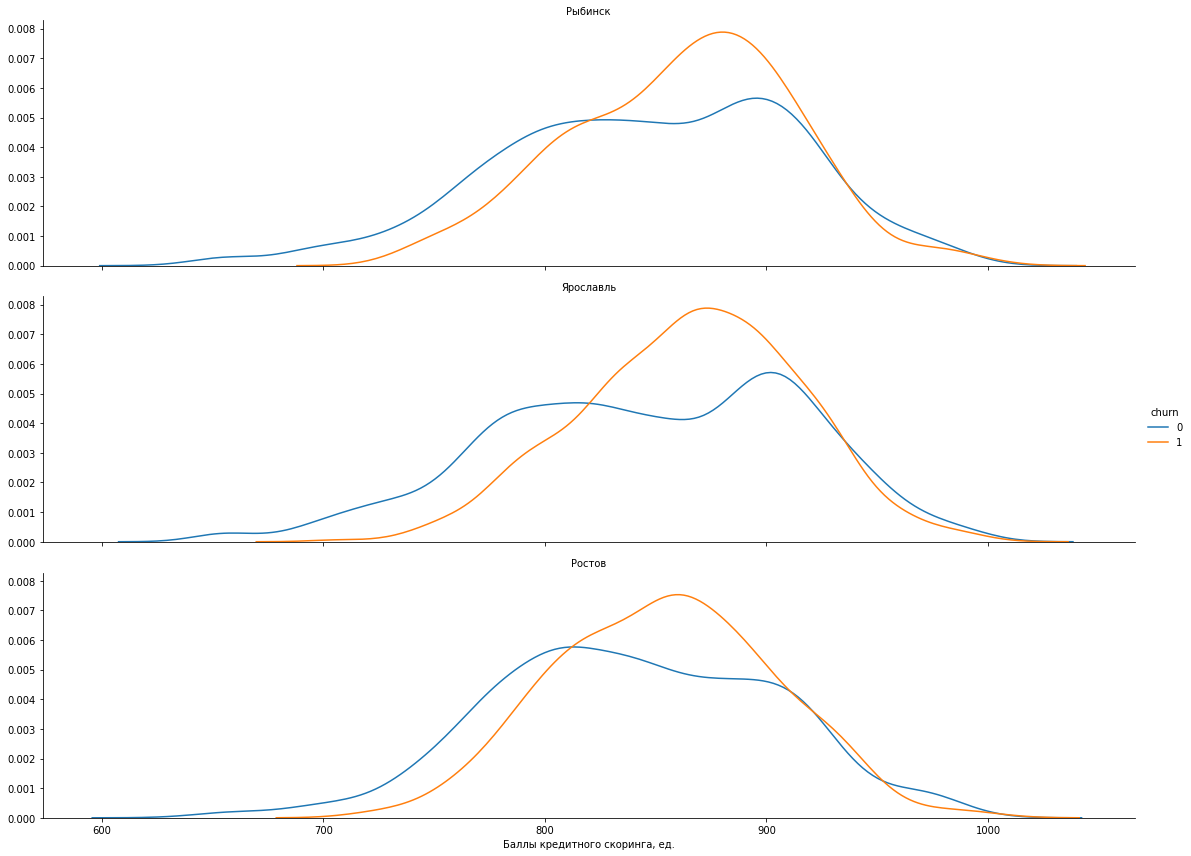

In [44]:
g = sns.FacetGrid(df, row='city', hue='churn', height=4, aspect=4)

g.map(sns.kdeplot, 'score')
g.set_xlabels('Баллы кредитного скоринга, ед.')
g.set_titles(row_template='{row_name}')
g.add_legend()

В Рыбинске и Ярославле похожее поведение клиентов. Но общее у трех городов что клинеты с 860-870 баллами скоринга имеют самый большой отток

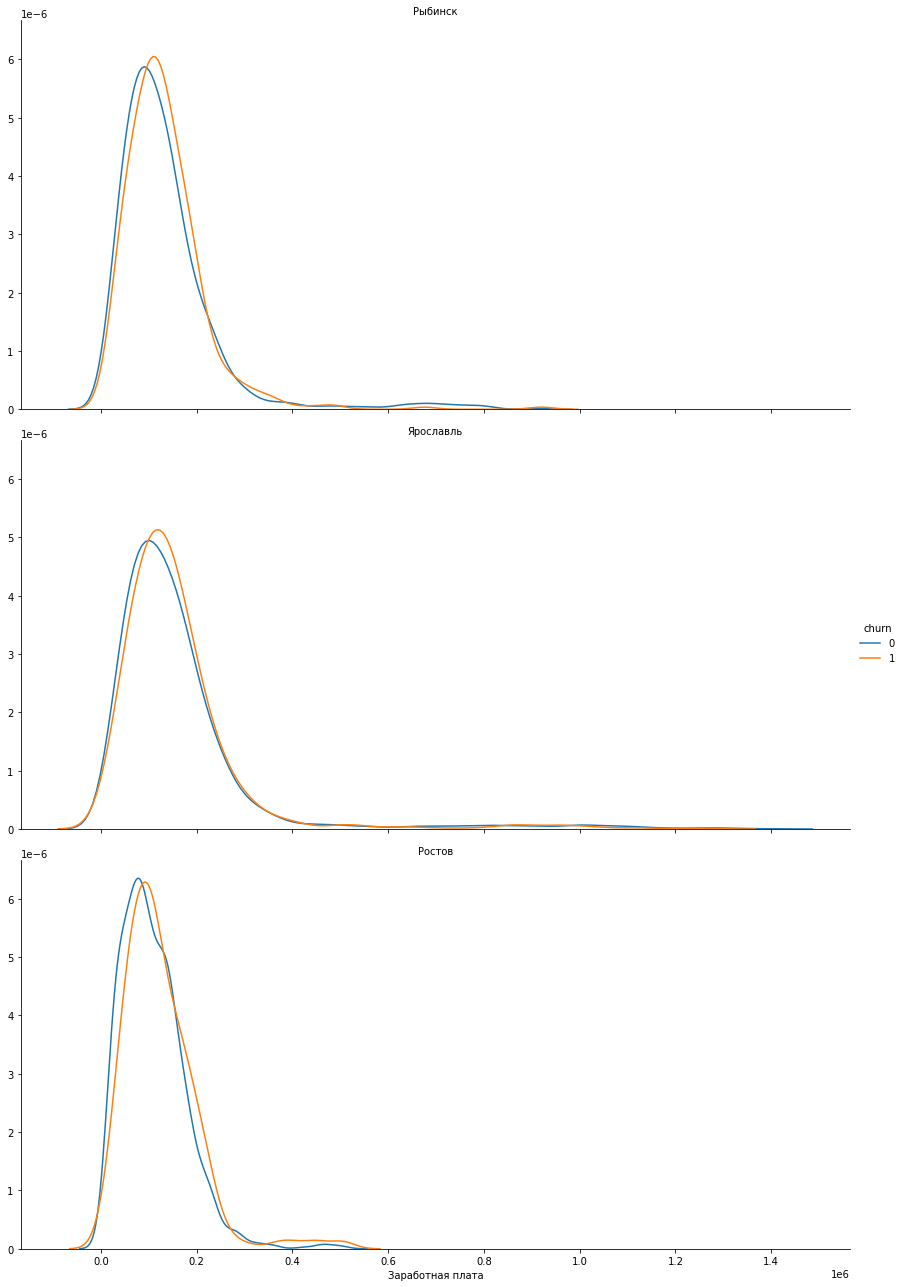

In [45]:
g = sns.FacetGrid(df, row='city', hue='churn', height=6, aspect=2)

g.map(sns.kdeplot, 'est_salary')
g.set_xlabels('Заработная плата')
g.set_titles(row_template='{row_name}')
g.add_legend()



в Ярославле и Рыбинске клиенты с высоким уровнем дохода более склонны отказываться от услуг банка, тогда как в Ростове Великом заработная плата особо не влият на уход.

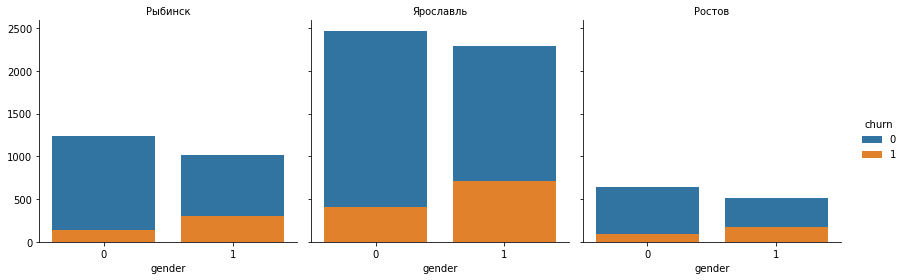

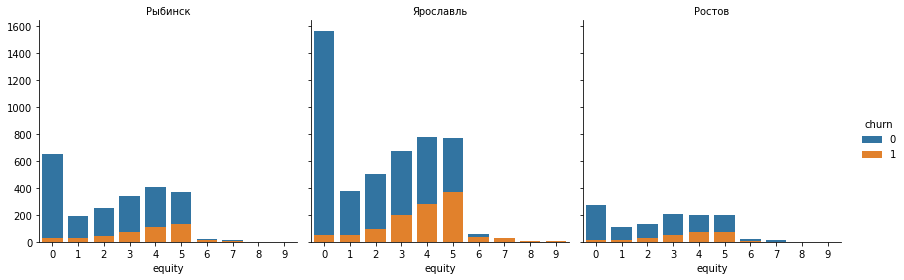

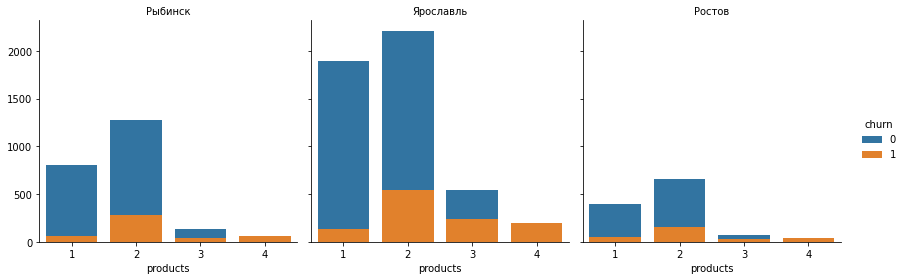

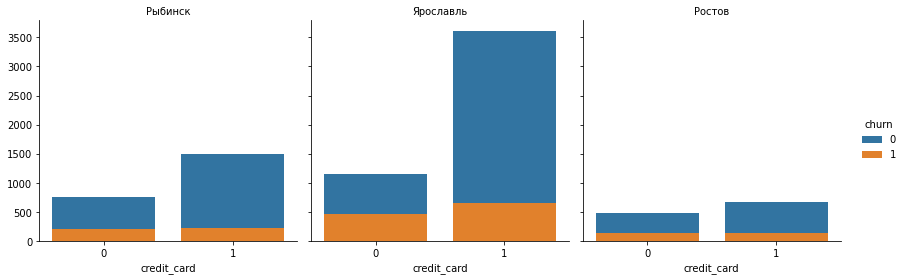

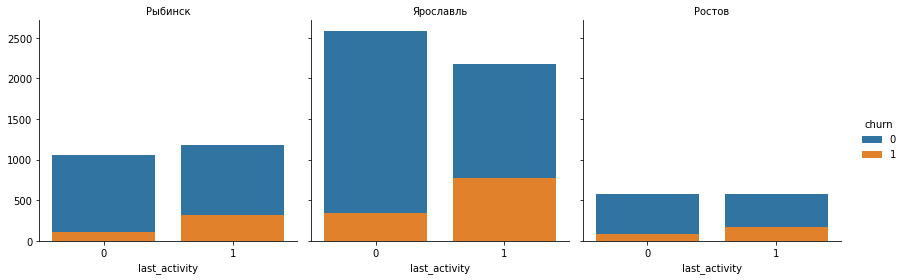

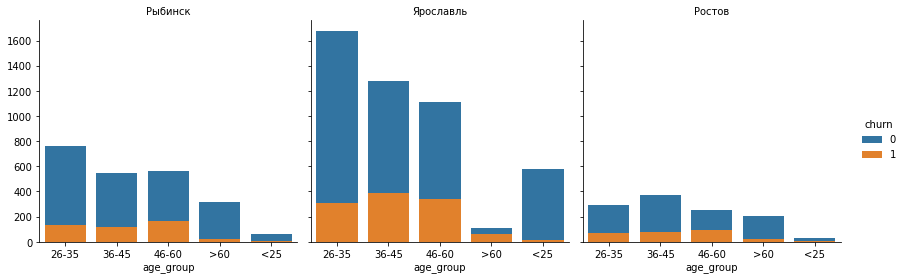

In [46]:
order = ['gender', 'equity', 'products', 'credit_card', 'last_activity', 'age_group']

for i in order:
    g = sns.FacetGrid(df, col='city', hue='churn',
                  height=4, aspect=1,)
    g.map(sns.countplot, i)
    g.set_titles(col_template='{col_name}')
    g.add_legend()
    g.tight_layout()

**Выводы:**

- по половому признаку распределение клиентов в городах одинаковое, преобладают женщины над мужчинами. Процент оттока среди мужчин больше. Доля оттока среди обеих групп примерно одинаковая.

- по количеству баллов собственности распределение в городах примерно одинаковое, при этом в Ярославлеом показател оттока явно выше чем в других городах.

- по количеству используемых продуктов лучше всего удерживаются клиенты, которые используют 1 и 2 продукта, а те кто использует 3 и особенно 4 продукта отоок большой.

- по наличию кредитной карты: положительные показатели удержания показывают клиенты с кредитной картой банка во всех городах.

- более активные клиенты чаше уходят из банка.

- во всех городах больше всего преобладают 3 группы 26-35, 36-45 и 46-60, у них самый большой отток. При этом в  Рыбинске в оттоке преобладает группа клиентов в возрасте от 26 до 35 лет, в Ярославле - 46-60 лет, в Ростове - 26-35 лет.

## Анализ по количеству используемых продуктов

In [47]:
df['products'].value_counts()

2    5119
1    3323
3    1038
4    474 
5    19  
Name: products, dtype: int64

,products,churn,count,sum,%
1,1,0,3088,3323,93.00
6,1,1,235,3323,7.00
0,2,0,4141,5119,81.00
2,2,1,978,5119,19.00
3,3,0,741,1038,71.00
5,3,1,297,1038,29.00
4,4,1,300,474,63.00
7,4,0,174,474,37.00
8,5,0,11,19,58.00
9,5,1,8,19,42.00


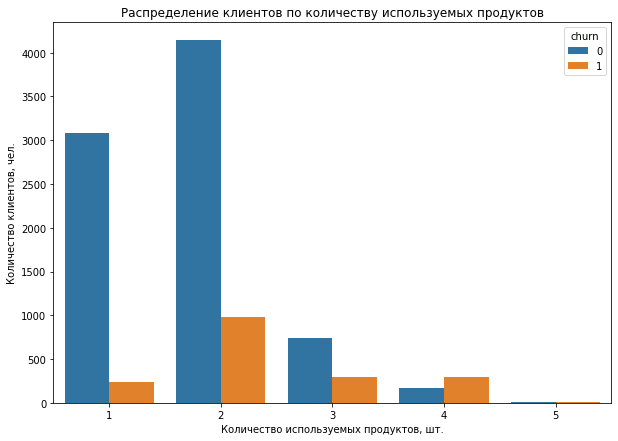

In [48]:
index_a = ['products', 'churn']
column_a = ['products', 'churn', 'count']
index_b = 'products'
column_b = ['products', 'sum']
merged = 'products'
sort = 'products'

#Создадим сводную таблицу
prcnt_func(index_a, index_b, column_a, column_b, merged, sort)

#Отобразим столюбчатые диаграммы распределения по количеству использкемых продуктов
plt.figure(figsize=(10, 7))
sns.countplot(x='products', hue='churn', data=df)
plt.title('Распределение клиентов по количеству используемых продуктов')
plt.xlabel('Количество используемых продуктов, шт.')
plt.ylabel('Количество клиентов, чел.')
plt.show()

Видна определенная зависимость: чем больше продуктов использует клиент тем больше у него отток

# Шаг 5. Проверка гипотез

## Гипотеза №1

Проверить, есть ли статистически значимое различие в балансе между клиентами, ушедшими в отток, и клиентами, которые остались

Н0 - статистически значимых различий в средних выборок баланса лицевого счета между клиентами, ушедшими в отток, и клиентами, которые остались нет.

Н1 - статистически значимые различия в средних выборок баланса лицевого счета между клиентами, ушедшими в отток, и клиентами, которые остались есть.

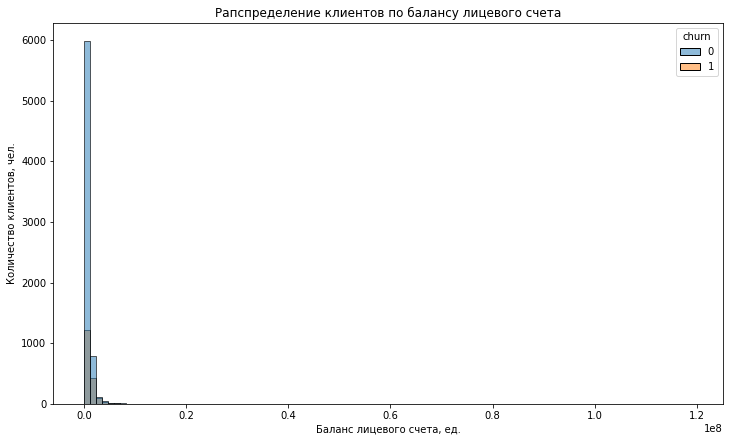

In [49]:
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='balance', hue='churn', bins=100)
plt.title('Рапспределение клиентов по балансу лицевого счета')
plt.xlabel('Баланс лицевого счета, ед.')
plt.ylabel('Количество клиентов, чел.')
plt.show()

Создадим две выборки - те, кто является клиентом банка, и те, кто покинул.

In [50]:

balance_churn_0 = df.query('churn == 0')['balance']
balance_churn_1= df.query('churn == 1')['balance']

In [51]:
balance_churn_0.describe()

count   6,974.00      
mean    757,656.74    
std     1,824,533.54  
min     0.00          
25%     294,616.76    
50%     520,293.98    
75%     902,469.44    
max     119,113,552.01
Name: balance, dtype: float64

In [52]:

balance_churn_1.describe()

count   1,807.00     
mean    1,133,942.70 
std     2,034,000.27 
min     6.00         
25%     387,218.33   
50%     782,410.47   
75%     1,348,101.46 
max     64,866,210.15
Name: balance, dtype: float64

In [53]:
print('Дисперсия клиентов не ушедших в отток:', np.var(balance_churn_0, ddof=1))
print('стандартное отклонение:', np.sqrt(np.var(balance_churn_0, ddof=1)))
print('')
print('Дисперсия клиентов ушедших в отток:', np.var(balance_churn_1, ddof=1))
print('стандартное отклонение:', np.sqrt(np.var(balance_churn_1, ddof=1)))

Дисперсия клиентов не ушедших в отток: 3328922639782.4287
стандартное отклонение: 1824533.5403281653

Дисперсия клиентов ушедших в отток: 4137157111687.1826
стандартное отклонение: 2034000.2732760836


Показатели дисперсии выборок имеют различия.


Проверять гипотезу будем c помощью t-критерия Стьюдента. Применять будем метод ttest_ind библиотеки scipy для сравнения средних двух независимых выборок с различной дисперсией.

In [54]:
#За критический уровень статистической значимости alpha примем значение 0,05
alpha = 0.05
#Выполним t-тест
results_balance = st.ttest_ind(balance_churn_0, balance_churn_1, equal_var=False)
print('p-значение:', results_balance.pvalue)

if results_balance.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: nan
Не получилось отвергнуть нулевую гипотезу


По результатам отвергаем нулевую гипотезу, а значит, что статистически значимые различия в балансе лицевого счета между клиентами, ушедшими в отток, и клиентами, которые остались есть.


## Гипотеза №2

Проверка гипотезы о различии дохода между клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним продуктом

Н0 - cтатистически значимых различий в доходе клиентов, которые пользуются одним продуктом и теми, кто пользуется двумя продуктами, нет.

Н1 - статистически значимые различия в доходе клиентов, которые пользуются одним продуктом и теми, кто пользуется двумя продуктам, есть.

Создадим две выборки 

In [55]:
est_1 = df.query('products == 1')['est_salary']
est_2 = df.query('products == 2')['est_salary']

In [56]:
est_1.describe()

count   3,323.00    
mean    180,605.23  
std     169,409.87  
min     2,546.30    
25%     90,522.11   
50%     142,163.00  
75%     204,319.05  
max     1,333,687.36
Name: est_salary, dtype: float64

In [57]:
est_2.describe()

count   5,119.00    
mean    130,400.38  
std     117,076.59  
min     5,341.50    
25%     69,809.65   
50%     109,508.21  
75%     159,195.54  
max     1,395,064.45
Name: est_salary, dtype: float64

In [58]:
print('Дисперсия клиентов c 1 продуктом:', np.var(est_1, ddof=1))
print('стандартное отклонение:', np.sqrt(np.var(est_1, ddof=1)))
print('')
print('Дисперсия клиентов с 2 проудктами:', np.var(est_2, ddof=1))
print('стандартное отклонение:', np.sqrt(np.var(est_2, ddof=1)))

Дисперсия клиентов c 1 продуктом: 28699703740.236942
стандартное отклонение: 169409.8690756738

Дисперсия клиентов с 2 проудктами: 13706928749.096077
стандартное отклонение: 117076.59351508344


In [59]:
alpha = 0.05
results_prod = st.ttest_ind(est_1, est_2, equal_var=False)
print('p-значение:', results_prod.pvalue)

if results_prod.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.1753502977148884e-49
Отвергаем нулевую гипотезу


По результатам отвергаем нулевую гипотезу, а значит - статистически значимые различия в доходе клиентов, которые пользуются одним продуктом и теми, кто пользуется двумя продуктам, есть.

## Шаг 6. Сегментация

На основе характеристик, которые больше всего влияют на отток, выделим сегменты клиентов банка:

### **Сегмент 1** Мужчины, у которых 3 и больше баллов собственности, не имеющие кредитной карты, активные:

In [60]:
df.query('equity >=3 and credit_card == 0 and gender == 1 and last_activity ==1').agg({"churn":["mean","sum","count"], 'balance':'mean'})

,churn,balance
mean,0.57,"1,483,640.35"
sum,287.00,NaN
count,503.00,NaN


Количество клиентов в сегменте - 503, отток 57 %, средний баланс на счете 1 403 700.

**Сегмент 2** Клиенты с высокими баллами кредитного скоринга (больше 850) и пользующиеся 3-5 продуктами банка:

In [61]:
df.query('score >= 850 and products >=3 and products <=5 ').agg({"churn":["mean","sum","count"], 'balance':'mean'})

,churn,balance
mean,0.52,"1,530,292.57"
sum,385.00,NaN
count,745.00,NaN


Количество клиентов в сегменте - 745, отток 52 %, средний баланс на счете 1 500 292.

**Сегмент 3** Молодые активные клиенты в возрасте 25-35 лет, не имеющие кредитную карту:

In [62]:
df.query('age >= 25 and age <= 35 and credit_card == 0 and last_activity == 1').agg({"churn":["mean","sum","count"], 'balance':'mean'})

,churn,balance
mean,0.49,"852,062.98"
sum,244.00,NaN
count,493.00,NaN


Количество клиентов в сегменте - 493, отток 49 %, средний баланс на счете 852 062.

**Сегмент 4** Активные клиенты в возрасте 50-60 лет, не имеющие кредитную карту, активные:

In [63]:
df.query('age >= 50 and age <= 60 and credit_card == 0 and last_activity == 1').agg({"churn":["mean","sum","count"], 'balance':'mean'})

,churn,balance
mean,0.44,"1,326,728.86"
sum,175.00,NaN
count,395.00,NaN


Количество клиентов в сегменте - 395, отток 44 %, средний баланс на счете 1 326 728.

**Приоритезация сегментов:**

- Сегмент 1 - отток 57 %
- Сегмент 2 - отток 52 %
- Сегмент 3 - отток 49 %
- Сегмент 4 - отток 44 %

## Шаг 7. Итог, о том какие показатели влият на отток клиентов. Выводы и рекомендации

**Выводы и рекомендации**

- В процессе исследования проведен анализ предоставленного датасета, данные содержат информацию о 10000 клиентах банка и признаках, характеризующих их поведение. 
- исправлены нарушения стиля в наименованиях столбцов, исправлены типы данных;
- заменены значения стоблца Gender с "Ж" на 0, с "М" на 1;
- значения столбца Balance были заполнены медианами;
- проведена проверка на дубликаты.

Результаты исследования:

1. Общее распределение признаков

Больше всего клиентов банка находится в Ярославле (около 5,8 тыс.клиентов), в Рыбинске (около 2,8 тыс.) и Ростове - в 2 раза меньше, в Ростове меньше других (около 1,5 тыс).

По данным выше мы можем предварительно составить достаточно обобщенный портрет клиента банка: мужчин и женщин примерно одинковое количество, возраст 42 года с 2-3 баллами собствености, со средним остатком на счетах 765 тыс.руб. и средним доходом в 147 тыс.руб,пользуется 1-2 продуктами, один их которых в 70% случаях - кредитная карта. Клиент скорее активный, чем нет, но активные/неактивные -примерно на одном уровне, вероятность ухода - около 20%

Самая большая корреляция между стобцами products и equity (43%) Что логично чем больше у клиента разной собственостью тем большими программмами банка он пользуется.

2. Распределение признаков относительно оттока

Общая доля оттока составляет около 20 % от общего количества пользователей.

При этом наименьшая доля оттока - в Рыбинске (16%), наибольший-в Ростове и Ярославле(19% от количества постоянных клиентов). Мужчины более склонны к уходу. Пользователи с кредитными картами уходят в меньшей степени чем у кого их нет, при этом активные клиенты с большей долей вероятности уходят из банка.

Клиенты, которые пользуются 1 продуктом - самая многочисленная группа по количеству преданных банку клиентов, а доля оттока у этой категории самая низкая. Тех, кто пользуется 2 продуктами немногим меньше,3 продуктами - 30 % оточных. Пользователи с 4-5 продуктами еще более отточны.

Больше всего клиентов - это люди среднего возраста, 30-43 года, они составляют основную массу тех, кто остается с банком. Наиболее склонны к оттоку лица от 25-27 и 51-60 лет.

Кредитный рейтинг, остаток на балансе и заработная плата клиента не оказывает влияния на принятие решения об уходе из банка.

3. Особенности, выявленные у клиентов филиалов разных городов:

по половому признаку распределение клиентов в городах одинаковое, преобладают женщины над мужчинами. Процент оттока среди мужчин больше. Доля оттока среди обеих групп примерно одинаковая.

по количеству баллов собственности распределение в городах примерно одинаковое, при этом в Ярославлеом показател оттока явно выше чем в других городах.

по количеству используемых продуктов лучше всего удерживаются клиенты, которые используют 1 и 2 продукта, а те кто использует 3 и особенно 4 продукта отоок большой.

по наличию кредитной карты: положительные показатели удержания показывают клиенты с кредитной картой банка во всех городах.

более активные клиенты чаше уходят из банка.

во всех городах больше всего преобладают 3 группы 26-35, 36-45 и 46-60, у них самый большой отток. При этом в Рыбинске в оттоке преобладает группа клиентов в возрасте от 26 до 35 лет, в Ярославле - 46-60 лет, в Ростове - 26-35 лет.

4. Распределение по количеству потребляемых продуктов

Всего 4 категории потребления в зависимости от количества используемых банковских продуктов: от 1 до 4.

Видна определенная зависимость: чем больше продуктов использует клиент тем больше у него отток.

5. Проверка гипотез

В рамках нашего исследования мы проверили две гипотезы:

 1. Есть ли статистически значимое различие в балансе между клиентами, ушедшими в отток, и клиентами, которые остались.
 
 По результатам отвергаем нулевую гипотезу, а значит, что статистически значимые различия в балансе лицевого счета между клиентами, ушедшими в отток, и клиентами, которые остались **есть**.

 2. Есть ли различие дохода между клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним продуктом. 

По результатам отвергаем нулевую гипотезу, а значит - статистически значимые различия в доходе клиентов, которые пользуются одним продуктом и теми, кто пользуется двумя продуктам, **есть**.

6. Сегментация.

**Сегмент 1 (отток 57%, количество клиентов в сегменте – 503):**

Мужчины, у которых 3 и больше баллов собственности, не имеющие кредитной карты, активные.

**Сегмент 2 (отток 52 %, количество клиентов в сегменте – 745):**

Клиенты с высокими баллами кредитного скоринга (больше 850) и пользующиеся 3-5 продуктами банка.

**Сегмент 3 (отток 49 %, количество клиентов в сегменте – 493):**

Молодые активные клиенты в возрасте 25-35 лет, не имеющие кредитную карту.

**Сегмент 4 (отток 44%, количество клиентов в сегменте – 493):**

Активные клиенты в возрасте 50-60 лет, не имеющие кредитную карту.

**Рекомендации при работе с сегментами:**

**Сегмент 1:**

Так как в этом сегменте у клиентов достаточно много баллов собственности, то, с целью удержания таких клиентов, можно предложить им выгодные программы страхования собственности со скидкой для клиентов банка.

Также таких клиентов могут заинтересовать программы инвестиций в недвижимость, можно предлагать им ипотечные и потребительские кредиты под сниженный процент на покупку квартир у партнеров банка-застройщиков.

Клиенты этого сегмента – мужчины, не имеющие кредитные карты. Нужно предложить им оформление кредитной карты с повышенным кэшбэком на такие категории товаров, «всё для дома и ремонта», «автотовары» и др.

**Сегмент 2:**

Клиентам с высокими баллами кредитного скоринга, пользующимся 3-5 продуктами стоит предложить рефинансирование их кредитных продуктов.

Скорее всего, среди этих клиентов много тех, кто пользуется несколькими кредитными продуктами, поэтому они имеют достаточно высокую ценность для банка, а так как они уходят, значит их что-то не устраивает в продуктах, которыми они пользуются.
Стоит предложить им премиальный формат обслуживания в лице личного менеджера (обработка их обращений в ускоренном режиме, возможность обращаться с вопросами по используемым продуктам непосредственно к определенному сотруднику банка).

**Сегмент 3:**

Молодым активным клиентам в возрасте 25-35 лет, не имеющим кредитную карту, стоит предложить оформление кредитной карты с повышенным кэшбэком на покупку товаров таких категорий, как «спорт», «путешествия», «образование».

Так же стоит предложить оформление кредитных продуктов (ипотека, потребительский кредит) со специальными условиями для молодых семей и минимальным первоначальным взносом.

**Сегмент 4:**

Активным клиентам в возрасте 50-60 лет, не имеющим кредитной карты, стоит предложить оформление кредитной карты с повышенным кэшбэком на покупки товаров таких категорий, как «товары для дома и дачи», «здоровье» и тд.

Также клиентов этого сегмента может заинтересовать предложение перевода пенсионного счета в банк на выгодных условиях. Стоит предложить открыть клиентам накопительный счет с повышенной процентной ставкой.

А также таких клиентов могут заинтересовать инвестиции и открытие брокерского счета, необходимо проинформировать клиентов о подобных программах, имеющихся в банке.



ссылка на презентацию https://disk.yandex.ru/i/Sdnw3jW7eZLwcg